In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

553476096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [2]:
for layer in model.layers:
	if 'conv' not in layer.name:
		continue
	filters, biases = layer.get_weights()
	print(layer.name, layer.output.shape)

block1_conv1 (None, 224, 224, 64)
block1_conv2 (None, 224, 224, 64)
block2_conv1 (None, 112, 112, 128)
block2_conv2 (None, 112, 112, 128)
block3_conv1 (None, 56, 56, 256)
block3_conv2 (None, 56, 56, 256)
block3_conv3 (None, 56, 56, 256)
block4_conv1 (None, 28, 28, 512)
block4_conv2 (None, 28, 28, 512)
block4_conv3 (None, 28, 28, 512)
block5_conv1 (None, 14, 14, 512)
block5_conv2 (None, 14, 14, 512)
block5_conv3 (None, 14, 14, 512)


In [3]:

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


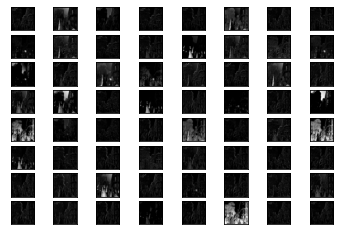

In [5]:
model = VGG16()
# après le permier layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# Charger l'image
img = load_img('chat.jpg', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
feature_maps = model.predict(img)
# 64 maps dans  8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1

pyplot.show()

In [6]:

from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
model = VGG16()
for i in range(len(model.layers)):
	layer = model.layers[i]
	
	if 'conv' not in layer.name:
		continue
	
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


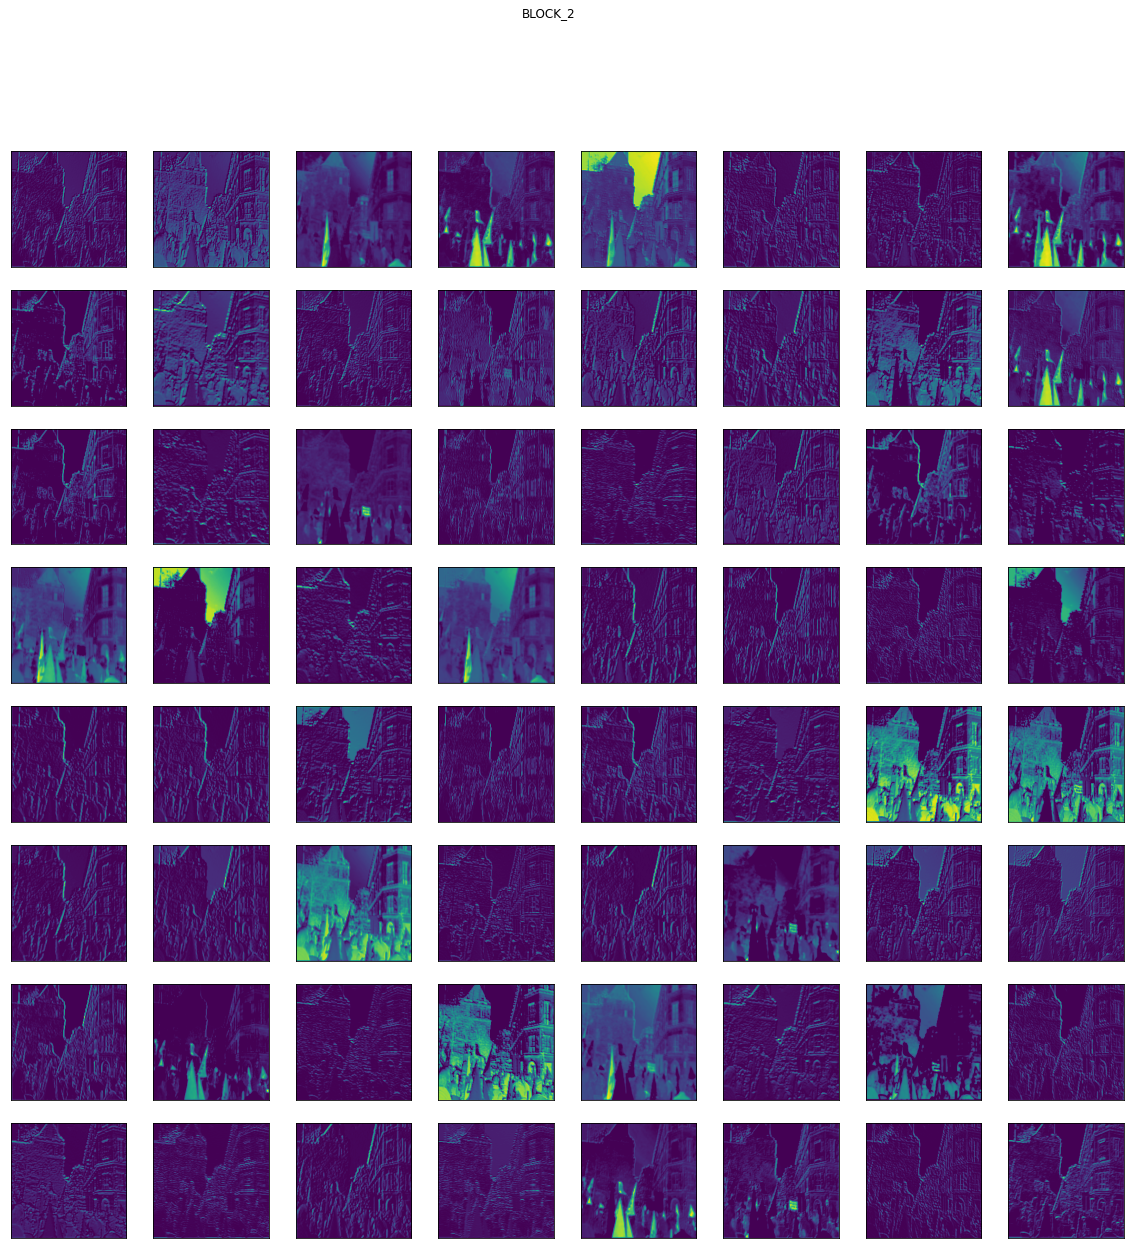

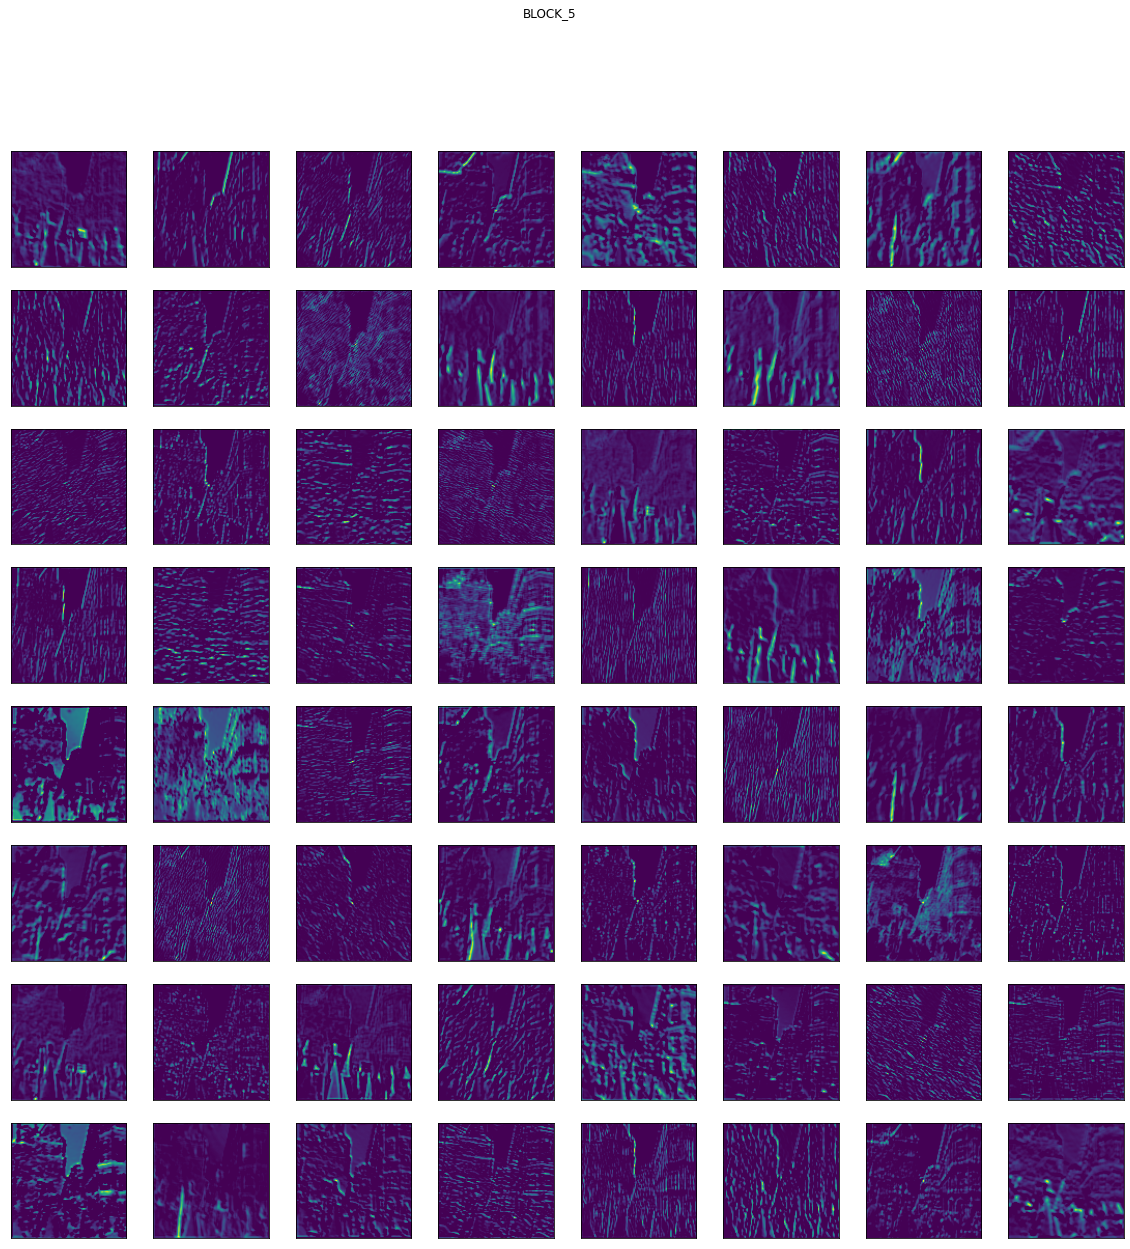

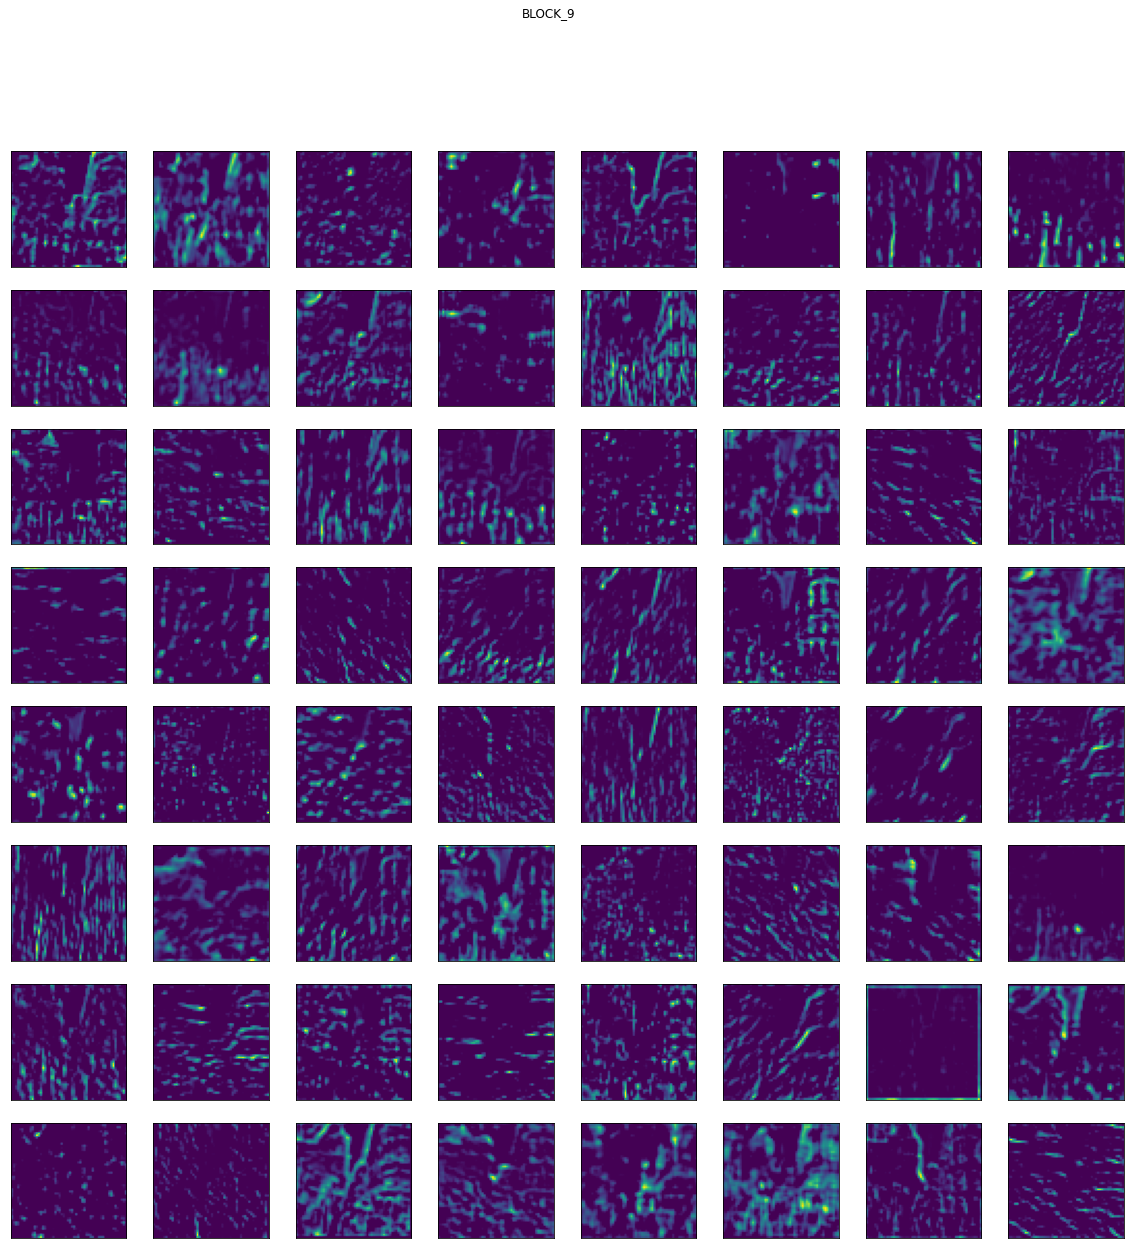

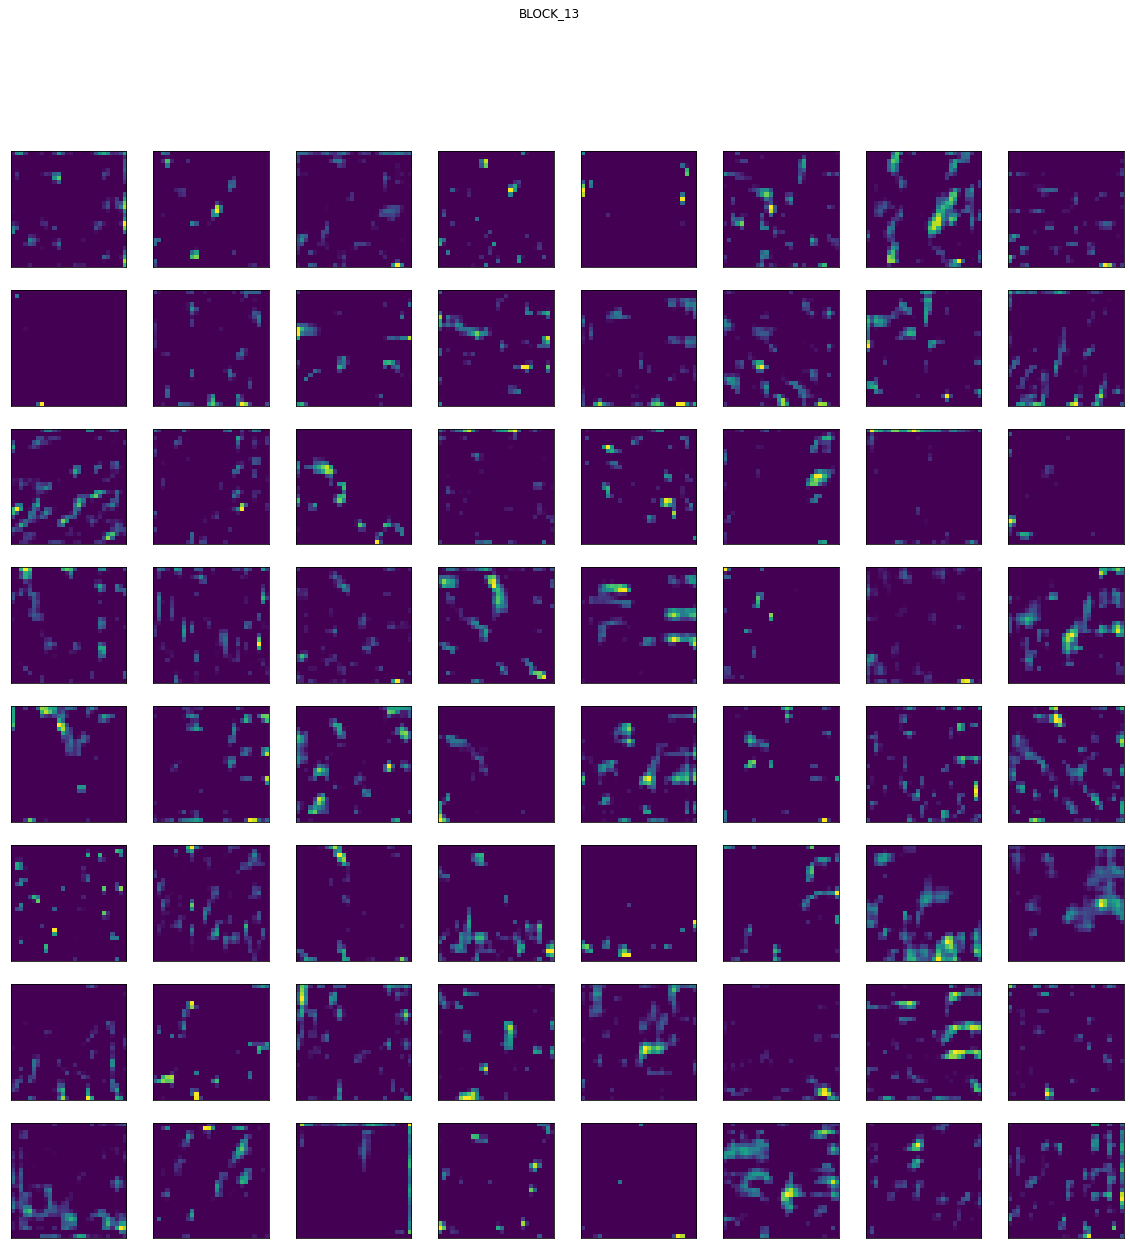

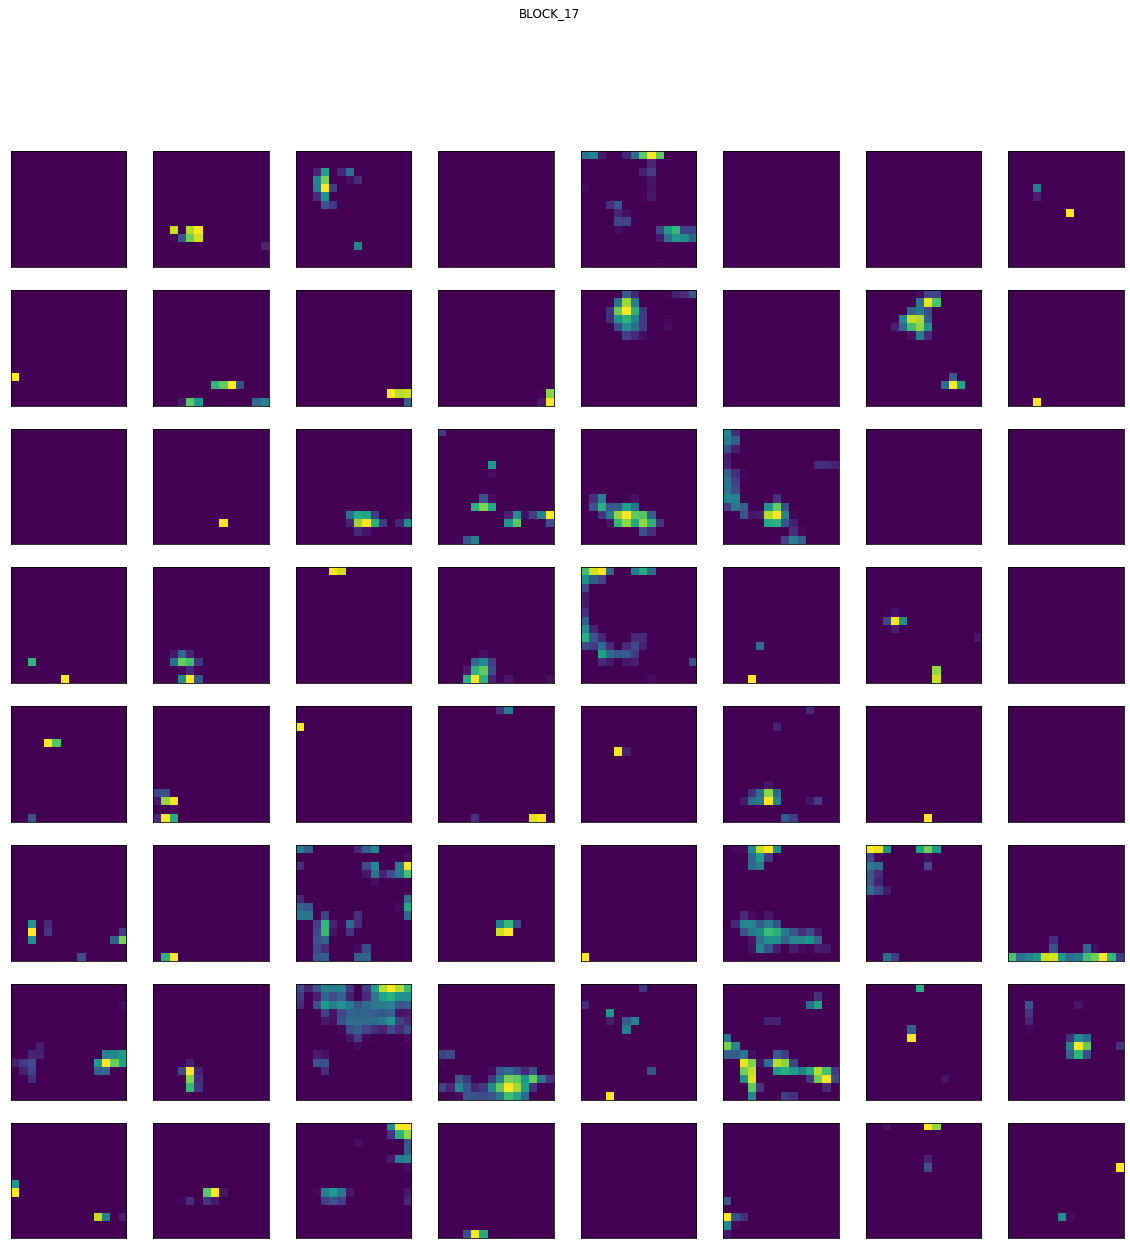

In [7]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

model = VGG16()
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
img = load_img('chat.jpg', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8

for i,fmap in zip(ixs,feature_maps) :
  ix = 1 
  fig = pyplot.figure(figsize=(20,20))
  fig.suptitle("BLOCK_{}".format(i))
  for _ in range(square): 
    
    for j in range(square):
      ax = pyplot.subplot(square,square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
     
      pyplot.imshow(fmap[0,:,:,ix-1])
      ix += 1 


  pyplot.show()
